In [19]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitute combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# import the time library and the datetime module form the datetime library
import time 
from datetime import datetime

In [9]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | primorsk
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | haines junction
Processing Record 9 of Set 1 | daru
Processing Record 10 of Set 1 | suhut
Processing Record 11 of Set 1 | hofn
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | baruun-urt
Processing Record 14 of Set 1 | belaya gora
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | aloleng
Processing Record 18 of Set 1 | vaitape
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | rabo de peixe
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | rio grande
P

Processing Record 35 of Set 4 | kitui
Processing Record 36 of Set 4 | pagudpud
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | ucluelet
Processing Record 39 of Set 4 | russell
Processing Record 40 of Set 4 | serenje
Processing Record 41 of Set 4 | san carlos de bariloche
Processing Record 42 of Set 4 | batetskiy
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | buin
Processing Record 45 of Set 4 | podor
Processing Record 46 of Set 4 | talavera de la reina
Processing Record 47 of Set 4 | meyungs
City not found. Skipping...
Processing Record 48 of Set 4 | mbini
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | terrace
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | biddeford
Processing Record 4 of Set 5 | ndjole
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | wenling
Process

Processing Record 28 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 29 of Set 8 | bababe
City not found. Skipping...
Processing Record 30 of Set 8 | gizo
Processing Record 31 of Set 8 | vila
Processing Record 32 of Set 8 | anadyr
Processing Record 33 of Set 8 | amazar
Processing Record 34 of Set 8 | kedrovyy
Processing Record 35 of Set 8 | hamza
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | gimbi
Processing Record 38 of Set 8 | sorland
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | tula
Processing Record 41 of Set 8 | uribia
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | elbistan
Processing Record 44 of Set 8 | olga
Processing Record 45 of Set 8 | kajaani
Processing Record 46 of Set 8 | prijepolje
Processing Record 47 of Set 8 | qasigiannguit
Processing Record 48 of Set 8 | tammisaari
Processing Record 49 of Set 8 | lakes entrance
Processing Record 50 of Set 8 | tsiroanomandidy
Proces

Processing Record 16 of Set 12 | phangnga
Processing Record 17 of Set 12 | yulara
Processing Record 18 of Set 12 | great yarmouth
Processing Record 19 of Set 12 | mwene-ditu
Processing Record 20 of Set 12 | atka
City not found. Skipping...
Processing Record 21 of Set 12 | sept-iles
Processing Record 22 of Set 12 | opuwo
Processing Record 23 of Set 12 | sao joao da barra
Processing Record 24 of Set 12 | kruisfontein
Processing Record 25 of Set 12 | tumpat
Processing Record 26 of Set 12 | tigre
Processing Record 27 of Set 12 | zlobin
Processing Record 28 of Set 12 | byron bay
Processing Record 29 of Set 12 | bauta
Processing Record 30 of Set 12 | korhogo
Processing Record 31 of Set 12 | jinchang
Processing Record 32 of Set 12 | port macquarie
Processing Record 33 of Set 12 | maldonado
Processing Record 34 of Set 12 | ambulu
Processing Record 35 of Set 12 | san angelo
Processing Record 36 of Set 12 | puerto escondido
Processing Record 37 of Set 12 | sunland park
Processing Record 38 of Se

In [10]:
len(city_data)

589

In [11]:
# convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-5.80,77,20,17.27,CA,2022-01-26 23:27:46
1,Klaksvik,62.2266,-6.5890,36.52,90,100,31.41,FO,2022-01-26 23:27:47
2,Primorsk,46.7348,36.3443,23.36,91,97,4.61,UA,2022-01-26 23:27:47
3,Punta Arenas,-53.1500,-70.9167,53.71,71,40,27.63,CL,2022-01-26 23:27:47
4,Nikolskoye,59.7035,30.7861,23.72,89,100,9.46,RU,2022-01-26 23:27:48
5,Cape Town,-33.9258,18.4232,68.41,78,0,1.99,ZA,2022-01-26 23:27:48
6,Haines Junction,60.7522,-137.5108,19.35,79,100,1.14,CA,2022-01-26 23:27:48
7,Daru,-9.0763,143.2092,81.54,85,100,6.85,PG,2022-01-26 23:27:49
8,Suhut,38.5311,30.5458,3.69,100,85,2.66,TR,2022-01-26 23:27:49
9,Hofn,64.2539,-15.2082,31.86,72,100,5.23,IS,2022-01-26 23:27:49


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-01-26 23:27:46,69.4541,-133.0374,-5.80,77,20,17.27
1,Klaksvik,FO,2022-01-26 23:27:47,62.2266,-6.5890,36.52,90,100,31.41
2,Primorsk,UA,2022-01-26 23:27:47,46.7348,36.3443,23.36,91,97,4.61
3,Punta Arenas,CL,2022-01-26 23:27:47,-53.1500,-70.9167,53.71,71,40,27.63
4,Nikolskoye,RU,2022-01-26 23:27:48,59.7035,30.7861,23.72,89,100,9.46
5,Cape Town,ZA,2022-01-26 23:27:48,-33.9258,18.4232,68.41,78,0,1.99
6,Haines Junction,CA,2022-01-26 23:27:48,60.7522,-137.5108,19.35,79,100,1.14
7,Daru,PG,2022-01-26 23:27:49,-9.0763,143.2092,81.54,85,100,6.85
8,Suhut,TR,2022-01-26 23:27:49,38.5311,30.5458,3.69,100,85,2.66
9,Hofn,IS,2022-01-26 23:27:49,64.2539,-15.2082,31.86,72,100,5.23


In [13]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [16]:
# extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module
import time

# get today's date in seconds
today = time.strftime("%x")
today

'01/26/22'

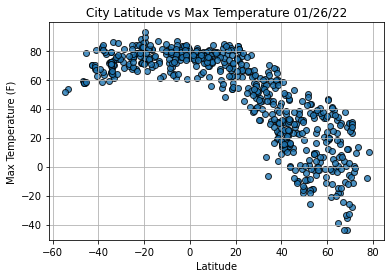

In [22]:
# build the scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, 
            marker = "o", alpha = 0.8, label = "Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

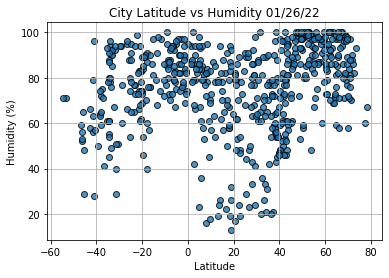

In [23]:
# build the scatter plot for latitude vs max temperature
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, 
            marker = "o", alpha = 0.8, label = "Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

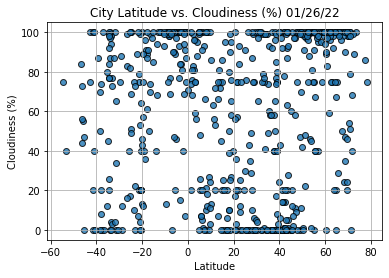

In [24]:
# build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

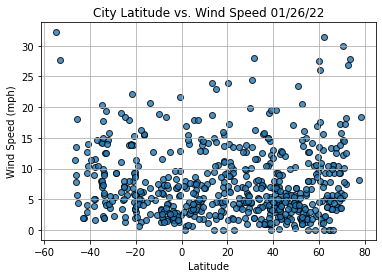

In [25]:
# build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()